In [66]:
from pyper import *
import feather

import pandas as pd
import sklearn
from sklearn import neighbors
#from sklearn import model_selection
import sklearn_pandas


r = R()
r.has_pandas = True

r('library(data.table)')
r('library(feather)')

def r_to_py():
    r('path<-c(paste0("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/df.feather"))')
    r('write_feather(df, path)')
    path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/df.feather"
    return feather.read_dataframe(path)

def py_to_r():
    path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/df.feather"
    feather.write_dataframe(df, path)
    r('path<-c("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/df.feather")')
    r('df<-read_feather(path)')



### Control task 3.1
Learn a decision tree from the Golf dataset (Operator: Decision Tree). Use
this tree to classify the examples in the Golf-Testset, which is also delivered
together with RapidMiner (Operator: Apply Model). For how many objects
does the trained tree predict the correct value?

In [67]:
r('golf_df<-fread("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/golf.csv", stringsAsFactors=TRUE, check.names=TRUE)')
r('golf_test_df<-fread("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/golf_test.csv", stringsAsFactors=TRUE, check.names=TRUE)')

'try({golf_test_df<-fread("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/golf_test.csv", stringsAsFactors=TRUE, check.names=TRUE)})\r\n'

In [68]:
print(r('sapply(golf_test_df, class)'))

try({sapply(golf_test_df, class)})
    Outlook Temperature    Humidity        Wind        Play 
   "factor"   "integer"   "integer"    "factor"    "factor" 



In [69]:
r('df<-golf_df')
golf_df = r_to_py()
r('df<-golf_test_df')
golf_test_df = r_to_py()

In [70]:
golf_df

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85,85,false,no
1,sunny,80,90,true,no
2,overcast,83,78,false,yes
3,rain,70,96,false,yes
4,rain,68,80,false,yes
5,rain,65,70,true,no
6,overcast,64,65,true,yes
7,sunny,72,95,false,no
8,sunny,69,70,false,yes
9,rain,75,80,false,yes


In [71]:
from sklearn import tree
mapper = sklearn_pandas.DataFrameMapper([
('Outlook', sklearn.preprocessing.LabelBinarizer()),
(['Temperature'], None), 
(['Humidity'], None), 
(['Wind'], sklearn.preprocessing.LabelBinarizer()), 
(['Play'], sklearn.preprocessing.LabelBinarizer())
], df_out=True)


golf_trans = mapper.fit_transform(golf_df.copy())

golf_trans_test = mapper.fit_transform(golf_test_df.copy())


X = golf_trans.ix[:,"Outlook_overcast":"Wind"].values
Y = golf_trans.ix[:,'Play'].values
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X, Y)

golf_trans.head()

,Outlook_overcast,Outlook_rain,Outlook_sunny,Temperature,Humidity,Wind,Play
0,0,0,1,85,85,0,0
1,0,0,1,80,90,1,0
2,1,0,0,83,78,0,1
3,0,1,0,70,96,0,1
4,0,1,0,68,80,0,1


In [72]:
pred_golf = clf.predict(golf_trans_test.ix[:,"Outlook_overcast":"Wind"].values)
sum(pred_golf==golf_trans_test.ix[:,'Play'].values)

10

The correct value is predicted in 10 cases.

### Golf Dataset – Evaluation
Evaluate the performance of your model by adding a Performance (Classification) operator to your process. Examine the confusion matrix. What is the accuracy of your classifier?

In [73]:
print(sklearn.metrics.classification_report(golf_trans_test.ix[:,'Play'].values, pred_golf))

             precision    recall  f1-score   support

          0       0.60      0.60      0.60         5
          1       0.78      0.78      0.78         9

avg / total       0.71      0.71      0.71        14



### Accuracy

In [74]:
sklearn.metrics.accuracy_score(golf_trans_test.ix[:,'Play'].values, pred_golf)

0.7142857142857143

### Apply model to test set

### Control task 3.3: Golf Dataset – k-NN
Does a k-Nearest-Neighbor (k-NN) classifier work better for this task? To find out, replace the Decision Tree operator with a k-NN operator and evaluate the trained model using different values for k. What is the best accuracy you can reach?

In [75]:
scores=dict()

for i in range(1,15):
    KN = sklearn.neighbors.KNeighborsClassifier(i)
    KN=KN.fit(X,Y)
    pred_golf = KN.predict(golf_trans_test.ix[:,"Outlook_overcast":"Wind"].values)
    #scores.append(sklearn.metrics.accuracy_score(golf_trans_test.ix[:,'Play'].values, pred_golf))
    scores.update({i:sklearn.metrics.accuracy_score(golf_trans_test.ix[:,'Play'].values, pred_golf)})
    

In [76]:
pd.DataFrame(pd.Series(scores).sort_values(ascending=False)).reset_index().rename(columns={"index":"k", 0:"accuracy"}).head(1)

,k,accuracy
0,1,0.714286


### Control task 3.4: Iris Flowers – ID3 
Set up the process as described above. What accuracy can you reach using the ID3 decision tree?

In [77]:
r('df<-iris')
iris = r_to_py()
iris.head()
iris.Species.unique()

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

In [78]:
iris['Sepal.Length'] = pd.qcut(iris['Sepal.Length'], 3)
iris['Sepal.Width'] = pd.qcut(iris['Sepal.Width'], 3)
iris['Petal.Length'] = pd.qcut(iris['Petal.Length'], 3)
iris['Petal.Width'] = pd.qcut(iris['Petal.Width'], 3)

path = "C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/df.feather"
feather.write_dataframe(iris, path)
r('path<-c("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/df.feather")')
r('iris_bins<-read_feather(path)')


'try({iris_bins<-read_feather(path)})\r\n'

In [79]:
from sklearn import *
mapper = sklearn_pandas.DataFrameMapper([
(['Sepal.Length'], sklearn.preprocessing.LabelBinarizer()),
(['Sepal.Width'], sklearn.preprocessing.LabelBinarizer()), 
(['Petal.Length'], sklearn.preprocessing.LabelBinarizer()), 
(['Petal.Width'], sklearn.preprocessing.LabelBinarizer()), 
(['Species'], sklearn.preprocessing.LabelBinarizer())
], df_out=True)


iris_trans = mapper.fit_transform(iris.copy())
X = iris_trans.ix[:,'Sepal.Length_(5.4, 6.3]':'Petal.Width_[0.1, 0.867]'].values
y = iris_trans.ix[:,'Species_setosa':'Species_virginica'].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30)


In [80]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf_ID3 = clf.fit(X_train, y_train)
pred_iris = clf_ID3.predict(X_test)

In [81]:
sklearn.metrics.accuracy_score(y_test, pred_iris)

1.0

After the binning, we reach an accuracy of 100 % for this sample. Note: This is not really the  ID3 algorithm, but a CART one. Sklearn does not have one. Just grab R, or RWeka, that is. Allowed, as weka algorithms are still deployable in various settings as java models. For the challenge, we assume we cant deploy R models, which of course is possible. It does show that python is still not as mature as other languages  on some (long forgotten) ML tasks, especially, historic algorithms are of no interest to the community. What works works. 

In [82]:
r('library(RWeka)')

"try({library(RWeka)})\r\nWarnmeldung:\r\nPaket 'RWeka' wurde unter R Version 3.3.3 erstellt \r\n"

### Control task 3.5: Iris Flowers – Decision Tree
What accuracy can be reached using this kind of decision tree algorithm?
Compare the different trained models (trees). In case you would need to
interpret the model as human, which model would you use and why? (Hint:
Keep in mind Occam’s Razor.)

In [83]:
iris = r_to_py()

mapper = sklearn_pandas.DataFrameMapper([
(['Sepal.Length'], None),
(['Sepal.Width'], None), 
(['Petal.Length'], None), 
(['Petal.Width'], None), 
(['Species'], sklearn.preprocessing.LabelBinarizer())], df_out=True)


iris_trans = mapper.fit_transform(iris.copy())
X = iris_trans.ix[:,'Sepal.Length':'Petal.Width'].values
y = iris_trans.ix[:,'Species_setosa':'Species_virginica'].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30)

clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(X_train, y_train)
pred_iris = clf.predict(X_test)
acc = sklearn.metrics.accuracy_score(y_test, pred_iris)

In [84]:
acc

0.9555555555555556

### Control task 3.5: Iris Flowers – Decision Tree 
What accuracy can be reached using this kind of decision tree algorithm?
Compare the different trained models (trees). In case you would need to
interpret the model as human, which model would you use and why? (Hint:
Keep in mind Occam’s Razor.)

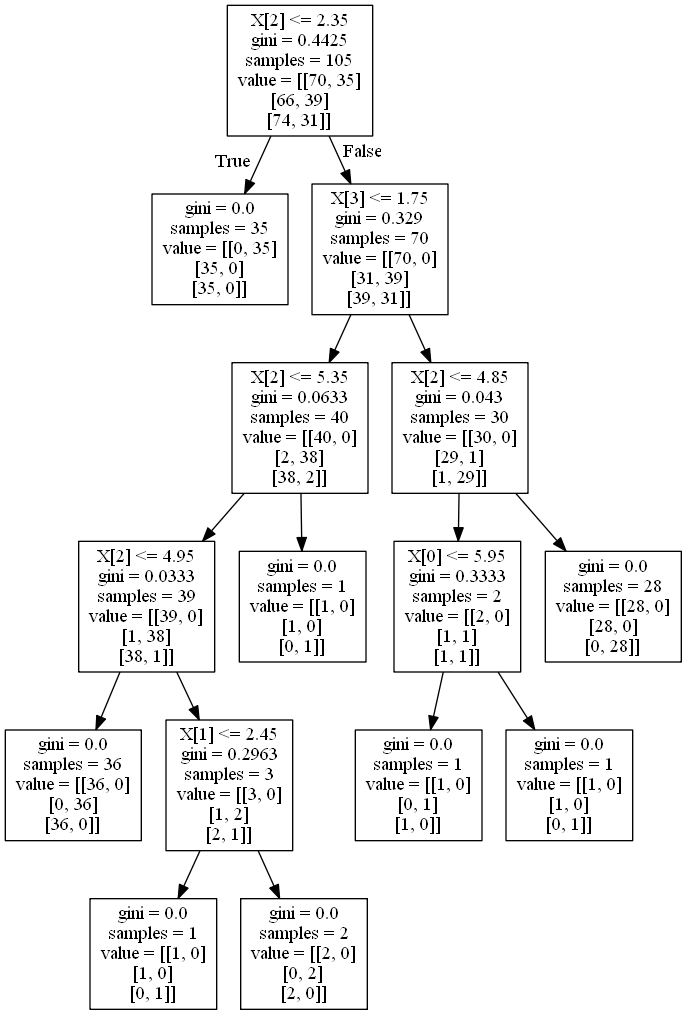

In [85]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
#graph.write_pdf("iris.pdf") 
Image(graph.create_png()) 

In [86]:
#r('library(RWeka)')
#r('WPM("refresh-cache")')
#r('WPM("list-packages", "available")')
#r('WPM("install-package", "simpleEducationalLearningSchemes")')
r('WPM("load-package", "simpleEducationalLearningSchemes")')
r('ID3 <- make_Weka_classifier("weka/classifiers/trees/Id3")') #we need to install and create the good old 1986 id3 algorithm
# J48 is alike

'try({ID3 <- make_Weka_classifier("weka/classifiers/trees/Id3")})\r\n'

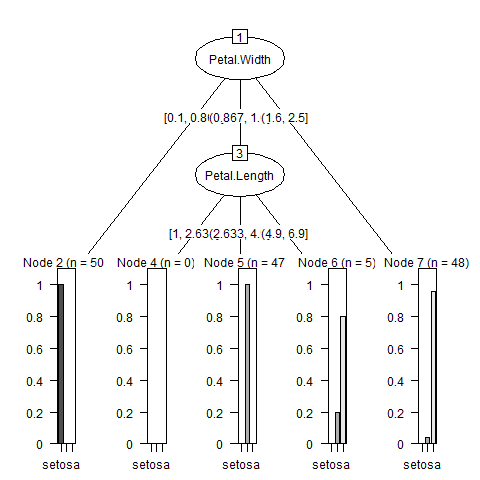

In [87]:

r('J48fit<-J48(Species ~ ., data = iris_bins)')
r('J48fit_plot<-plot(J48fit)')
r('partykit')

# Save the figure
r("png('rplot.png');if(require('partykit', quietly = TRUE)) plot(J48fit);dev.off()")


# Upload the figure to Jupyter
from IPython.display import Image
Image("rplot.png",width=800,height=400)

With regard to interpretability, ID3, as showing where most records are after only 2 steps instead of the deeeper binary choices in the CART variant in sklearn. ä 

In [88]:
r('ID3fit<-ID3(Species ~ ., data = iris_bins)')
print(r('ID3fit'))

try({ID3fit})
Id3


Petal.Width = [0.1, 0.867]: setosa
Petal.Width = (0.867, 1.6]
|  Petal.Length = [1, 2.633]: null
|  Petal.Length = (2.633, 4.9]: versicolor
|  Petal.Length = (4.9, 6.9]
|  |  Sepal.Length = [4.3, 5.4]: null
|  |  Sepal.Length = (5.4, 6.3]: virginica
|  |  Sepal.Length = (6.3, 7.9]: virginica
Petal.Width = (1.6, 2.5]
|  Sepal.Width = [2, 2.9]: virginica
|  Sepal.Width = (2.9, 3.2]
|  |  Petal.Length = [1, 2.633]: null
|  |  Petal.Length = (2.633, 4.9]: virginica
|  |  Petal.Length = (4.9, 6.9]
|  |  |  Sepal.Length = [4.3, 5.4]: null
|  |  |  Sepal.Length = (5.4, 6.3]: virginica
|  |  |  Sepal.Length = (6.3, 7.9]: virginica
|  Sepal.Width = (3.2, 4.4]: virginica



### Control task 3.6: Credit Dataset – ROC 
Apply the Compare ROCs operator to the dataset and include k-NN (with
different values for k), Decision Tree, Naive Bayes and Rule Induction.
Which classification approach looks most promising to you?

In [89]:
r('credit<-read.arff("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/credit-g.arff")')

'try({credit<-read.arff("C:/Users/Knuts-L450/Desktop/DS Studium/10300 Datamining/VL 3 Classification/credit-g.arff")})\r\n'

In [90]:
print(r('sapply(credit, class)'))

try({sapply(credit, class)})
       checking_status               duration         credit_history 
              "factor"              "numeric"               "factor" 
               purpose          credit_amount         savings_status 
              "factor"              "numeric"               "factor" 
            employment installment_commitment        personal_status 
              "factor"              "numeric"               "factor" 
         other_parties        residence_since     property_magnitude 
              "factor"              "numeric"               "factor" 
                   age    other_payment_plans                housing 
             "numeric"               "factor"               "factor" 
      existing_credits                    job         num_dependents 
             "numeric"               "factor"              "numeric" 
         own_telephone         foreign_worker                  class 
              "factor"               "factor"               "

In [91]:
r('df<-credit')
credit = r_to_py()
pd.get_dummies(credit.head())

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_0<=X<200,checking_status_>=200,...,job_unemp/unskilled non res,job_unskilled resident,job_skilled,job_high qualif/self emp/mgmt,own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no,class_good,class_bad
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,0,0,...,0,0,1,0,0,1,1,0,1,0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,1,0,...,0,0,1,0,1,0,1,0,0,1
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,0,0,...,0,0,1,0,1,0,1,0,0,1


In [92]:
from hpsklearn import HyperoptEstimator, multinomial_nb, knn, decision_tree
from hyperopt import hp

clf = hp.pchoice( 'my_name', 
          [ ( 0.25, decision_tree('my_name.decision_tree', min_samples_leaf=3, min_samples_split=2) ),
            ( 0.25, multinomial_nb('my_name.multinomial_nb') ),
            ( 0.25, knn('my_name.knn') ) ]) #old school rule induction done with orange, not implemented in hpsklearn
#or autosklearn

estim = HyperoptEstimator( classifier=clf ,  preprocessing=[], max_evals=30) #no preprocessing

credit['class'] = credit['class'].astype(str) #it appeears that sklearn is not really capable of using categoricals... 
### it is puzzling a lot compared to R

#preprocess
X =pd.get_dummies(credit.ix[:,1:len(credit.columns)-1]).values

mapper = sklearn_pandas.DataFrameMapper([
(['class'], sklearn.preprocessing.LabelBinarizer())], df_out=True)# default=None)#, df_out=True)

y = mapper.fit_transform(credit.copy()).values


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.30)

estim.fit( X_train, y_train )

# get accuracy and best model
print( estim.score( X_test, y_test ) )
print( estim.best_model() )

#print(sklearn.metrics.roc_curve(y_true, y_score))

0.67
{'preprocs': (), 'ex_preprocs': (), 'learner': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=4.0,
           weights='distance')}


c:\users\knuts-l450\desktop\hyperopt-sklearn\hpsklearn\estimator.py:657: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._best_learner.fit(XEX, y)


In [93]:
credit.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
class                       object
dtype: object

In [94]:
import Orange

def convert_dataframe_to_orange(df):
    df.to_csv('_temp_.csv',index_label='id')
    orange_table = Orange.data.Table('_temp_.csv')
    os.unlink('_temp_.csv')
    return orange_table

#credit_orange = convert_dataframe_to_orange(credit)

credit['class'] = credit['class'].astype('category')

cat_columns = credit.select_dtypes(['category']).columns
credit[cat_columns] = credit[cat_columns].apply(lambda x: x.cat.codes)

import numpy as np
from Orange.data.domain import DiscreteVariable, ContinuousVariable
from Orange.data import Domain, Table
domain = Domain([
    DiscreteVariable('checking_status', values=[str(v) for v in np.unique(credit.checking_status)]),
    ContinuousVariable('duration'),
    DiscreteVariable('credit_history', values=[str(v) for v in np.unique(credit.credit_history)]),
    DiscreteVariable('purpose', values=[str(v) for v in np.unique(credit.purpose)]),
    ContinuousVariable('credit_amount'),
    DiscreteVariable('savings_status', values=[str(v) for v in np.unique(credit.savings_status)]),
    DiscreteVariable('employment', values=[str(v) for v in np.unique(credit.employment)]),    
    ContinuousVariable('installment_commitment'),
    DiscreteVariable('personal_status', values=[str(v) for v in np.unique(credit.personal_status)]),    
    DiscreteVariable('other_parties', values=[str(v) for v in np.unique(credit.other_parties)]),     
    ContinuousVariable('residence_since'),
    DiscreteVariable('property_magnitude', values=[str(v) for v in np.unique(credit.property_magnitude)]),
    ContinuousVariable('age'),  
    DiscreteVariable('other_payment_plans', values=[str(v) for v in np.unique(credit.other_payment_plans)]),    
    DiscreteVariable('housing', values=[str(v) for v in np.unique(credit.housing)]),  
    ContinuousVariable('existing_credits'), 
    DiscreteVariable('job', values=[str(v) for v in np.unique(credit.job)]),    
    ContinuousVariable('num_dependents'),  
    DiscreteVariable('own_telephone', values=[str(v) for v in np.unique(credit.own_telephone)]),           
    DiscreteVariable('foreign_worker', values=[str(v) for v in np.unique(credit.foreign_worker)])],     
    class_vars = DiscreteVariable('class', values=[str(v) for v in np.unique(credit['class'])]))

credit_orange = Orange.data.Table.from_numpy(domain, credit.ix[:,1:len(credit.columns)].values, credit['class'].values)
#table = Table(domain, credit_orange)

In [102]:
from Orange.evaluation import testing
help(testing)

Help on module Orange.evaluation.testing in Orange.evaluation:

NAME
    Orange.evaluation.testing

CLASSES
    builtins.object
        Results
            CrossValidation
            LeaveOneOut
            ShuffleSplit
            TestOnTestData
                TestOnTrainingData
    
    class CrossValidation(Results)
     |  K-fold cross validation.
     |  
     |  If the constructor is given the data and a list of learning algorithms, it
     |  runs cross validation and returns an instance of `Results` containing the
     |  predicted values and probabilities.
     |  
     |  .. attribute:: k
     |  
     |      The number of folds.
     |  
     |  .. attribute:: random_state
     |  
     |  Method resolution order:
     |      CrossValidation
     |      Results
     |      builtins.object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, data, learners, k=10, stratified=True, random_state=0, store_data=False, store_models=False, preprocessor=None, call

In [63]:
#train test set

Orange.evaluation.testing.sample(credit_orange)


# construct the learning algorithm and use it to induce a classifier
cn2_learner = Orange.classification.rules.CN2Learner()
cn2_clasifier = cn2_learner(credit_orange)

# ... or, in a single step.
cn2_classifier = Orange.classification.rules.CN2Learner(credit_orange)


In [64]:
Orange.evaluation.testing.sample(

# Accuracy
Orange.evaluation.scoring.CA(cn2_classifier)

AttributeError: 'CN2Learner' object has no attribute 'predicted'

In [65]:
Orange.evaluation.testing.sample(credit_orange)

IndexError: list index out of range

In [ ]:
cat_columns = credit.select_dtypes(['category']).columns
credit[cat_columns] = credit[cat_columns].apply(lambda x: x.cat.codes)

In [ ]:
credit.dtypes

In [ ]:
credit['class'] =  credit['class'].astype('category')
Orange.data.Table(domain, credit.ix[:,2:len(credit.columns)].values, credit['class'])

In [ ]:
s = np.array(credit.values)
Orange.data.Table.from_numpy(domain, s)

In [ ]:
np.array(credit.values)